# Homework 1: A sinister homework

By the end of this homework, we expect you to be able to:

1. Load data and handle data using pandas;
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy real-world datasets;
4. Aggregate your data in different (and hopefully helpful) ways;
5. Create meaningful visualizations to analyze the data;
6. Communicate your findings in a clear and concise manner


---

## Important Dates
- Homework release: Fri 13 Oct 2023
- **Homework due:** Fri 27 Oct 2023, 23:59
- Grade release: Mon 06 Nov 2023

---

## Some rules
1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)

3. Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.

4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation **(in markdown)**.

5. Back up any hypotheses and claims with data, since this is an important aspect of the course.

6. Please write all your comments in **English**, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. **If there are multiple notebooks present, we will not grade anything.**

7. We will **not run your notebook for you!** Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.

8. In continuation to the previous point, interactive plots, such as those generated using the `plotly` package, should be strictly avoided!

9. Make sure to print results and/or dataframes that confirm you have properly addressed the task.


---

##  Context

Congratulations! You have just been hired as a data scientist at "The ByteBlasters", EPFL’s amateur baseball club. The team's manager, Mr. Russo, an eccentric millionaire with an innovative plan to dominate the Swiss baseball league, believes hiring left-handed pitchers (the people who throw the ball) will likely boost the team's performance. Yet, he is concerned about money, as he heard left-handed pitchers have historically earned more!

He tasked you to investigate this "sinister" issue and gave you some openly available data on the birthplace of this beautiful, dynamic sport --- the US.

**About the homework.** This homework consists of four tasks. In Task 0, you will familiarize yourself with the rules of baseball. In Task 1, you will process the data, getting it ready for analysis. In Task 2, you will analyze the data to answer Mr. Russo’s question. Lastly, in Task 3, you will conduct additional analyses that consider the longitudinal nature of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo


# Task 0 (Ungraded): Baseball 101

**0.1 —** Familiarize yourself with the data; we won't explain the data in-depth in this notebook. Instead, you should take your time to read the readme.txt file inside the data folder. Note that this data is available on [GitHub](https://github.com/chadwickbureau/baseballdatabank).

**0.2 —** Familiarize yourself with basic baseball rules. We will explain everything you need to know, but it will be helpful to get a basic understanding of it. Watching the video below should be enough! (Also available [here](https://www.youtube.com/watch?v=WMA8L5OpuDY).)

A couple of useful things to remember:
- **Pitchers** (try to) throw the ball
- **Batters** (try to) hit the ball with the bat
- **Catchers** (try to) catch the ball.


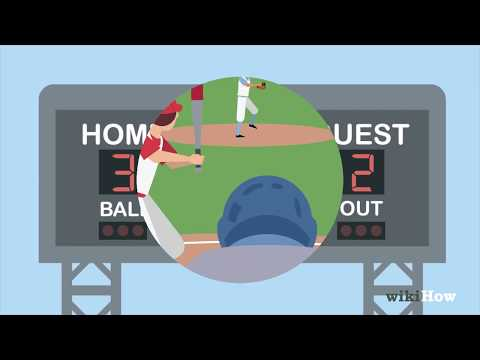

In [2]:
YouTubeVideo('WMA8L5OpuDY', width=800, height=300)

---

# Task 1 (16 pts): Get to Know Your Data

As a good data scientist, you first load the data and perform some small sanity checks on it.

1. You are expected to continuously alter your dataframe as you complete the tasks. E.g., if you are asked to filter the data in a specific task, continue using the filtered dataset in the subsequent tasks.
2. When we tell you to "print the dataframe," make sure you print it in a way that shows the total number of rows and columns in it (`display(df)` should suffice).

---

**1.1 —** Load the `People`, `Salaries`, and `Pitching` dataframes. Then:
- Filter the `Salaries`, and `Pitching` dataframes to remove all data after the year 2010.
- For the `Salaries` dataframe drop all duplicate salaries for players in a given year. In other words, if a player (uniquely identified by `PlayerID`) has multiple salaries in a year (`yearID`), keep the first occurence in the dataframe and drop the remaining.
- Calculate the size of each dataframe. 

Make [deep copies](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of all dataframes as you filter them.

Hints:
- 2007 should be included in the data.
- 2010 should be included in the data.
- 2011 should not be included in the data.

**Load the data**

In [3]:
data_folder = './data/baseballdatabank-2023/'
core_data_folder = f'{data_folder}core/'
contrib_data_folder = f'{data_folder}contrib/'
people = pd.read_csv(f'{core_data_folder}People.csv', sep=',', index_col='playerID')
salaries = pd.read_csv(f'{contrib_data_folder}Salaries.csv', sep=',')
pitching = pd.read_csv(f'{core_data_folder}Pitching.csv', sep=',')

**Filter Salaries and Pitching**

In [4]:
LAST_YEAR = 2010
salaries_before_2011 = salaries.copy().query('yearID <= @LAST_YEAR')
pitching_before_2011 = pitching.copy().query('yearID <= @LAST_YEAR')

**Filter duplicate salaries**

In [5]:
unique_salaries_player_year = salaries_before_2011.copy().groupby(['playerID', 'yearID']).nth(0)

t = unique_salaries_player_year.set_index(['playerID', 'yearID', 'lgID', 'teamID'])


**Sizes of dataframes**

In [6]:
print(f'Size of people: {people.shape}')
print(f'Size of pitching before 2011: {pitching_before_2011.shape}')
print(f'Size of unique salaries for player per year: {unique_salaries_player_year.shape}')

Size of people: (20676, 23)
Size of pitching before 2011: (40433, 30)
Size of unique salaries for player per year: (21351, 5)


**1.2 —** The `throws` column in the `People` dataframe indicates, for each player, whether they throw with the left ("L") or right hand ("R"). Check what values are in the column and drop rows containing any value that is not "L" or "R," again, make a deep copy when you filter the dataframe.

Hint: Remember NaNs!

**Explore values that are not "L" or "R"**

In [7]:
people.throws[people.throws.apply(lambda x: (x != 'R') & (x != 'L'))].unique()

array([nan, 'S'], dtype=object)

We can see form the previous code, that in addition to *R* and *L*, the *throws* column contains *NaN* and *S* as well.

So we will drop all the *S*, as well as all the *NaN*

In [8]:
people_L_R = people.copy()
people_L_R.throws = people.throws[people.throws != 'S']
people_L_R.dropna(subset=['throws'], inplace=True)

**1.3 —** Merge the `People` dataframe with the `Pitching` dataframe. Your merge should populate the pitching data with statistics about the players. Print the resulting dataframe.

In [9]:
pitching_people = pd.merge(pitching_before_2011, people_L_R, how='left', left_on='playerID', right_index=True)
display(pitching_people)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,Brainard,Asahel,150.0,68.0,NaN,R,1871-05-05,1874-10-14,braia102,brainas01
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,Ferguson,Robert Vavasour,149.0,69.0,B,R,1871-05-18,1884-07-01,fergb101,fergubo01
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,Fisher,William Charles,164.0,69.0,R,R,1871-05-06,1878-07-09,fishc102,fishech01
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40428,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,Zambrano,Carlos Alberto,275.0,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01
40429,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,Ziegler,Brad Gregory,220.0,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01
40430,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,Zimmermann,Jordan Michael,225.0,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02
40431,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,Zito,Barry William,205.0,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01


**1.4 —** You realize some of the data for the `throws` column is missing! Estimate the percentage of missing data points per year in that column, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 1892.

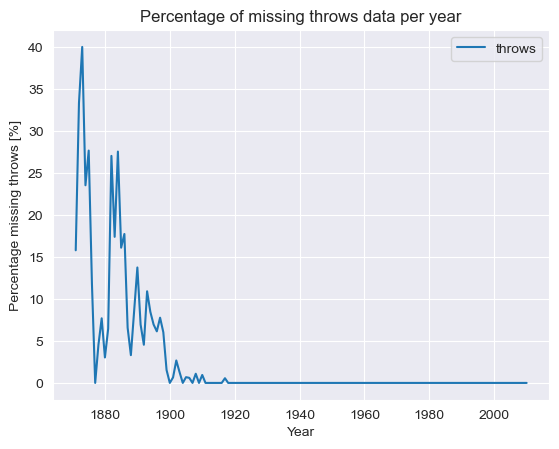

4.545% of the throws data were missing in 1892.


In [10]:
throws_by_year = pitching_people[['yearID', 'throws']].groupby('yearID')
percentage_missing_throws_per_year = throws_by_year.agg(lambda x: x.isna().sum() / len(x) * 100)
percentage_missing_throws_per_year.plot()
plt.title('Percentage of missing throws data per year')
plt.xlabel('Year')
plt.ylabel('Percentage missing throws [%]')
plt.show()
print(f'{percentage_missing_throws_per_year.loc[1892, "throws"]:.3f}% of the throws data were missing in 1892.')

**1.5 —** Filter the dataset you just merged (hereinafter `Pitching-People`) to just contain data from after 1920 (with 1920 included). Do the same with the `Salaries` dataset. Make deep copies of both dataframes as you filter them.



In [11]:
FIRST_YEAR = 1920
pitching_people_between_1920_2010 = pitching_people.copy().query('yearID >= @FIRST_YEAR')
salaries_between_1920_2010 = unique_salaries_player_year.copy().query('yearID >= @FIRST_YEAR')

**1.6 —**  Merge the `Pitching-People` dataframe with the `Salaries` dataframe. Your merge should populate the `Pitching-People` dataframe with statistics about the pitchers'salaries across the years. Note that the `Salaries` dataframe contains the salary **per year.** Print the resulting dataframe.

In [12]:
pitching_people_salaries = pd.merge(pitching_people_between_1920_2010, salaries_between_1920_2010, how='left', on=['playerID', 'yearID'])
display(pitching_people_salaries)

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,height,bats,throws,debut,finalGame,retroID,bbrefID,teamID_y,lgID_y,salary
0,acostjo01,1920,1,WS1,AL,5,4,17,5,4,...,66.0,R,R,1920-07-28,1922-05-12,acosj101,acostjo01,NaN,NaN,NaN
1,adamsba01,1920,1,PIT,NL,17,13,35,33,19,...,71.0,L,R,1906-04-18,1926-08-11,adamb104,adamsba01,NaN,NaN,NaN
2,alexape01,1920,1,CHN,NL,27,14,46,40,33,...,73.0,R,R,1911-04-15,1930-05-28,alexg102,alexape01,NaN,NaN,NaN
3,altener01,1920,1,DET,AL,0,1,14,1,0,...,72.0,R,L,1920-04-17,1920-06-30,altee101,altener01,NaN,NaN,NaN
4,ayersdo01,1920,1,DET,AL,7,14,46,23,8,...,73.0,R,R,1913-09-09,1921-05-21,ayerd101,ayersdo01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,CHN,NL,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,OAK,AL,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN,NaN,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,SFN,NL,18500000.0


**1.7 —** You realize some of the data for the `salary` column is missing! Estimate the percentage of missing data points per year, and show your estimates in a line plot. Additionally, print what percentage of the data was missing in 2002.


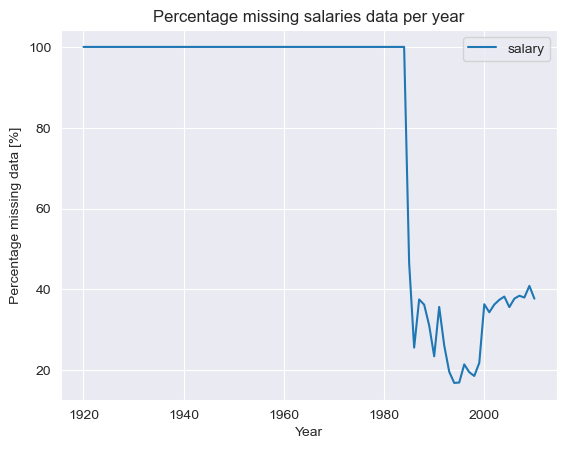

36.267% of the salaries data were missing in 2002.


In [13]:
pitching_people_salaries_per_year = pitching_people_salaries[['yearID', 'salary']].groupby('yearID')
percentage_missing_salaries_per_year = pitching_people_salaries_per_year.agg(lambda x: x.isna().sum() / len(x) * 100)
percentage_missing_salaries_per_year.plot()
plt.title('Percentage missing salaries data per year')
plt.xlabel('Year')
plt.ylabel('Percentage missing data [%]')
plt.show()
print(f'{percentage_missing_salaries_per_year.loc[2002, "salary"]:.3f}% of the salaries data were missing in 2002.')

**1.8 —** Find and print the first and last year for which there exists any salary data. Filter the resulting, merged dataframe to include only data between these two dates. Again make sure you make a deep copy of the dataframe, and print the resulting dataframe.

**Find first and last year**

In [14]:
#filter out nan from salaries to only have row for which there is a salary
non_nan_salaries = pitching_people_salaries.dropna(subset=['salary'])
# return the smallest year and the biggest year.
[min_year, max_year] = non_nan_salaries.yearID.agg([min, max])
print(f'The first year for which there is salary information is {min_year}.\nThe last year for which there is salary information is {max_year}.')

The first year for which there is salary information is 1985.
The last year for which there is salary information is 2010.


**Filter dataframe to include only data between these two dates**

In [15]:
pitching_people_salaries_existing_salaries = pitching_people_salaries.copy().query('@min_year <= yearID & yearID <= @max_year')
display(pitching_people_salaries_existing_salaries)

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,height,bats,throws,debut,finalGame,retroID,bbrefID,teamID_y,lgID_y,salary
18432,aasedo01,1985,1,BAL,AL,10,6,54,0,0,...,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN,NaN,NaN
18433,abregjo01,1985,1,CHN,NL,1,1,6,5,0,...,72.0,R,R,1985-09-04,1985-10-03,abrej001,abregjo01,NaN,NaN,NaN
18434,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,74.0,R,R,1983-04-07,1992-06-14,ackej001,ackerji01,TOR,AL,170000.0
18435,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,74.0,L,L,1981-09-07,1993-06-19,agosj001,agostju01,CHA,AL,147500.0
18436,aguilri01,1985,1,NYN,NL,10,7,21,19,2,...,76.0,R,R,1985-06-12,2000-09-06,aguir001,aguilri01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33876,zambrca01,2010,1,CHN,NL,11,6,36,20,0,...,76.0,B,R,2001-08-20,2012-09-21,zambc001,zambrca01,CHN,NL,18875000.0
33877,zieglbr01,2010,1,OAK,AL,3,7,64,0,0,...,76.0,R,R,2008-05-31,2018-09-29,ziegb001,zieglbr01,OAK,AL,410000.0
33878,zimmejo02,2010,1,WAS,NL,1,2,7,7,0,...,74.0,R,R,2009-04-20,2021-05-07,zimmj003,zimmejo02,NaN,NaN,NaN
33879,zitoba01,2010,1,SFN,NL,9,14,34,33,1,...,74.0,L,L,2000-07-22,2015-09-30,zitob001,zitoba01,SFN,NL,18500000.0


---

# Task 2 (16 pts)

Task 1, was a softball? Huh? For Task 2, you will use a dataset similar to what you obtained at the end of Task 1. This code loads it.


In [16]:
# PROVIDED CODE

df = pd.read_csv("./data/dataset-task-2.csv")
df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,salary
0,prietar01,1998,1,OAK,AL,0,1,2,2,0,...,Ariel,220.0,75.0,R,R,1995-07-02,2001-05-10,priea001,prietar01,NaN
1,pooleji02,2000,1,DET,AL,1,0,18,0,0,...,James Richard,190.0,74.0,L,L,1990-06-15,2000-06-01,poolj001,pooleji02,200000.0
2,leecl02,2007,1,CLE,AL,5,8,20,16,1,...,Clifton Phifer,205.0,75.0,L,L,2002-09-15,2014-07-31,lee-c003,leecl02,3000000.0
3,purceda01,2010,1,TOR,AL,1,1,33,0,0,...,David Kent,245.0,77.0,L,L,2008-04-18,2013-09-20,purcd001,purceda01,NaN
4,gundeer01,1992,1,SEA,AL,2,1,9,0,0,...,Eric Andrew,175.0,72.0,R,L,1990-04-11,2000-05-17,gunde001,gundeer01,NaN


Some comments about this dataset:
- This is a sample of the dataset obtained in Task 1. 
- Even if you  did everything correctly for Task 1, this dataframe would contain a different number of rows --- as it is a sample.
- This prevent that mistakes made in Task 1 cascade into Tasks 2 and 3.


With this data, you will proceed to investigate differences in the salaries and performance of left-handed and right-handed pitchers.

---

**2.1 —** Plot the Complementary cumulative distribution function (CCDF) of salary for left-handed and right-handed athletes. Consider data from all years.

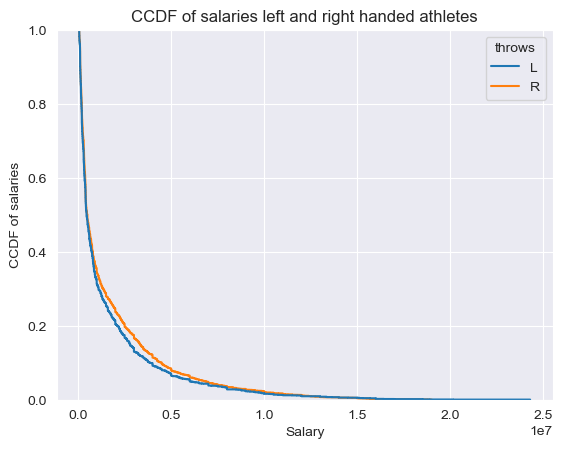

In [17]:
import seaborn as sn
df_salary_throws = df[['salary', 'throws']].copy()
df_salary_throws.dropna(subset='salary', inplace=True) # filter out nan values
sn.ecdfplot(df_salary_throws, x='salary', hue='throws', complementary=True)
plt.title('CCDF of salaries left and right handed athletes')
plt.ylabel('CCDF of salaries')
plt.xlabel('Salary')
plt.show()

**2.2 —** /Discuss:/ This plot has an issue which severely limits the amount of information one can draw from it. Describe the issue and propose a solution to address it.

The problem with this distribution, is that it is heavy-tailed, and it is hard to read information on it. Instead, we could use a log axes to address this problem.

**2.3 —** Implement the solution proposed by yourself in the previous question.

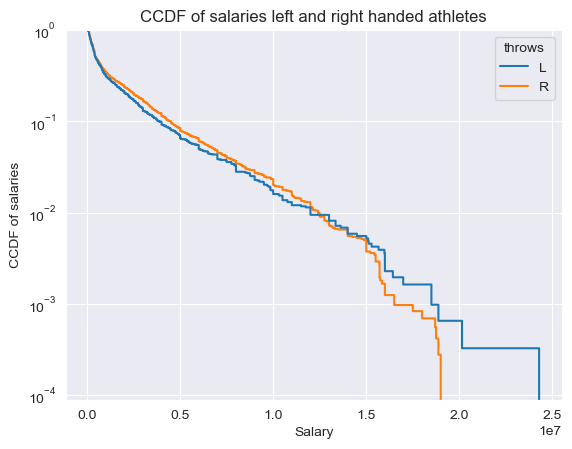

In [18]:
sn.ecdfplot(df_salary_throws,x='salary', hue='throws', complementary=True, log_scale=(False, True))
plt.title('CCDF of salaries left and right handed athletes')
plt.ylabel('CCDF of salaries')
plt.xlabel('Salary')
plt.show()

**2.4 —** /Discuss:/ Considering this second version of the plot, describe what the plot shows with regard to the distribution of salaries from left- and right-handed pitchers.

From the CCDF, we can see that right-handed athletes tends to earn slightly more than left-handed athletes up until $1.25*10^7$, and after that left-handed athletes tends to earn more than the right-handed one.

**2.5—** Calculate the mean and the 95% confidence interval for the salary of left-handed and right-handed pitchers aggregating data across all years. Print the estimates. Additionally, present the estimates and the confidence intervals in a [point plot](https://seaborn.pydata.org/_images/pointplot_7_0.png). Calculate your confidence intervals using the standard error of the mean and ignoring missing values.

The mean of the left-handed salary is 1437232.861, with a 95% confidence interval of [1352631.023, 1521834.700]
The mean of the left-handed salary is 1597010.136, with a 95% confidence interval of [1539505.775, 1654514.497]


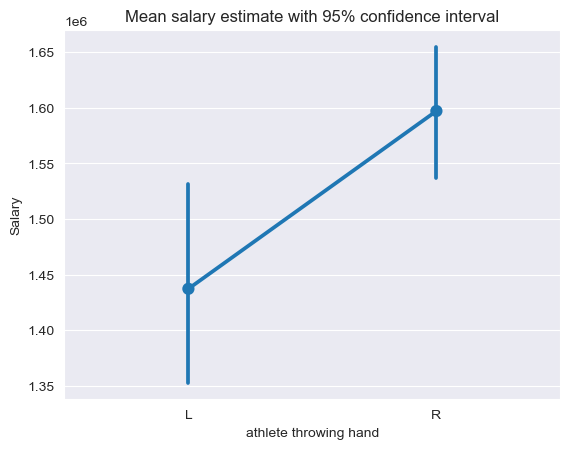

In [19]:
import scipy.stats as st
df_salary_throws_L = df_salary_throws[df_salary_throws.throws == 'L'].salary
df_salary_throws_R = df_salary_throws[df_salary_throws.throws == 'R'].salary

[mean_L, std_L] = df_salary_throws_L.agg(['mean', 'std']) 
[mean_R, std_R] = df_salary_throws_R.agg(['mean', 'std'])

cf_mean_salary_L_inf, cf_mean_salary_L_sup = st.norm.interval(confidence=0.95, loc=mean_L, scale=std_L/np.sqrt(len(df_salary_throws_L)))
cf_mean_salary_R_inf, cf_mean_salary_R_sup  = st.norm.interval(confidence=0.95, loc=mean_R, scale=std_R/np.sqrt(len(df_salary_throws_R)))

print(f'The mean of the left-handed salary is {mean_L:.3f}, with a 95% confidence interval of [{cf_mean_salary_L_inf:.3f}, {cf_mean_salary_L_sup:.3f}]')
print(f'The mean of the left-handed salary is {mean_R:.3f}, with a 95% confidence interval of [{cf_mean_salary_R_inf:.3f}, {cf_mean_salary_R_sup:.3f}]')

sn.pointplot(df_salary_throws, x='throws', y='salary', errorbar=('ci', 95))
plt.title('Mean salary estimate with 95% confidence interval')
plt.ylabel('Salary')
plt.xlabel('athlete throwing hand')
plt.show()


**2.6 —** /Discuss:/ Can you tell whether the difference between the two distributions is statistically significant (at the .05 level of significance) from the image? Why?

Yes the differences are actually significant. Because the two confidence interval don't overlap.

**2.7 —** Perform a t-test test comparing the salaries of left-handed and right-handed pitchers at the .05 level of significance. Consider data from all years. /Discuss:/ Who earns more?

In [20]:
# TODO, see if correct to make alternative assumption that right-handed earn more on average based on the previous graph ?
st.ttest_ind(df_salary_throws_R, df_salary_throws_L, alternative='greater')

TtestResult(statistic=3.0106974397099378, pvalue=0.0013064026252689476, df=10293.0)

As the statistic is equal to $3.01069$ and is positive, the mean of the salary from right-handed athletes is higher than the mean from the left-handed athletes. The null hypotheses $H_0$ that both populations have the same mean can be rejected, because the p-value is equal to $0.0013064 < 0.05$. And therefore we can consider that the alternative hypotheses $H_A$ that the salary of the right-handed athletes is on average higher than the one from the left-handed is significant.

---

Now, let's turn to analyzing performance. A commonly used metric to evaluate the skill of a pitcher is to look at the batting average of the pitcher’s opponents. According to [Wikipedia](https://en.wikipedia.org/wiki/Batting_average_against),

> In baseball statistics, batting average against (denoted by BAA or AVG), also known as opponents' batting average (denoted by OBA), is a statistic that measures a pitcher's ability to prevent hits during official at bats. It can alternatively be described as the league's hitters' combined batting average against the pitcher.

The intuition is clear: if you are a pitcher, you do not want the batter actually to hit the ball. Thus, if you are a good pitcher, the opponent batter should miss a lot against you! Conveniently, this is already calculated on a yearly basis in our data.

---

**2.8 —** Considering data from all years, calculate the mean opponents' batting average for left- and right-handed pitchers. Run a t-test test to determine if this difference is statistically significant at the .05 level of significance. **Consider only pitchers in the years during which they have played atleast 5 games.** /Discuss:/ According to this approach, who are the better pitchers? Left-handed or right-handed pitchers?

In [21]:
MIN_NB_GAME = 5
df_baopp_throws = df.query('G >= @MIN_NB_GAME')[['BAOpp', 'throws']].copy() #select only pitcher with at least 5 games
df_baopp_throws_L = df_baopp_throws[df_baopp_throws.throws == 'L'].BAOpp
df_baopp_throws_R = df_baopp_throws[df_baopp_throws.throws == 'R'].BAOpp
mean_L = df_baopp_throws_L.mean()
mean_R = df_baopp_throws_R.mean()

print(f"Mean opponents' batting average for left-handed pitchers: {mean_L:.4f}")
print(f"Mean opponents' batting average for right-handed pitchers: {mean_R:.4f}")
#TODO see if it make sens to make the alternative hypotheses that the mean opponents' batting average is greater for the left-handed. (It was asked at the beginning to investigate if left-handed pitcher were to increase the team performance)
st.ttest_ind(df_baopp_throws_L, df_baopp_throws_R, alternative='greater')

Mean opponents' batting average for left-handed pitchers: 0.2704
Mean opponents' batting average for right-handed pitchers: 0.2678


TtestResult(statistic=2.7523037123322776, pvalue=0.002962965813276675, df=13055.0)

The pitcher with the best average are the left-handed pitchers. And as the p-value is $0.002963$ which is smaller than $0.05$, we can reject the null hypotheses $H_0$ that both population mean are the same. And the alternate hypotheses $H_A$ that the left-handed player have a better mean opponents' batting average is significant.

# Task 3 (18 pts)

Before you report your results to Mr. Russo, you decide to run them by your favorite Applied Data Analysis' TA, Ms. Sakota. She seems skeptical! According to her, you should take into account the time variable!

**3.1 —** Repeat the analysis from tasks 2.7 and 2.8 considering only data from the year 2000. That is, use a t-test to determine the distribution of salaries (2.7) and opponents' batting average (2.8) for all data of the year 2000 only. 

**t-test on salaries distribution for year 2000**

In [22]:
YEAR = 2000
df_salary_throws_2000 = df.query('yearID == @YEAR')[['salary', 'throws']].copy()
df_salary_throws_2000.dropna(subset='salary', inplace=True) # filter out nan values

df_salary_throws_2000_L = df_salary_throws_2000[df_salary_throws_2000.throws == 'L'].salary
df_salary_throws_2000_R = df_salary_throws_2000[df_salary_throws_2000.throws == 'R'].salary

st.ttest_ind(df_salary_throws_2000_R, df_salary_throws_2000_L, alternative='greater')

TtestResult(statistic=0.3682145722424321, pvalue=0.35644982075363485, df=418.0)

We can see from the result of the t-test, that on average the right-handed athletes earn more than the left-handed athletes. But as the p-value $0.3564498$ is greater than $0.05$, the null hypotheses $H_0$ that both populations have the same mean cannot be rejected. There is insufficient evidence at the $\alpha = 0.05$ level to conclude that the average salary of the right-handed athletes is significantly greater than the one from the left-handed athletes.

**t-test on opponents' batting average**

In [23]:
#TODO do we still have to keep only pitcher that have played at least 5 games ?
df_baopp_throws_2000 = df.query('G >= @MIN_NB_GAME & yearID == @YEAR')[['BAOpp', 'throws']].copy()

df_baopp_throws_2000_L = df_baopp_throws_2000[df_baopp_throws_2000.throws == 'L'].BAOpp
df_baopp_throws_2000_R = df_baopp_throws_2000[df_baopp_throws_2000.throws == 'R'].BAOpp

st.ttest_ind(df_baopp_throws_2000_L, df_baopp_throws_2000_R, alternative='greater')

TtestResult(statistic=0.17825458856772244, pvalue=0.42929335457947027, df=567.0)

We can see from the result that on average the left-handed pitcher have higher mean opponents' batting average. But as the p-value $0.42929$ is greater than $0.05$, the null hypotheses $H_0$ that both population have the same mean cannot be rejected. There is insufficient evidence at the $\alpha = 0.05$ level to conclude that the average opponents' batting average of the left-handed pitcher is significantly greater than the on e form the right-handed pitcher

**3.2 —** Create a single plot with 14 inches of width and 4 inches of height. The plot should contain three panels:
- Panel A: The percentage of left-handed pitchers per year;
- Panel B: The average salary of all pitchers per year
- Panel C: The average opponents' batting average of all pitchers per year.

Additionally, print, for the year 2007:
- the percentage of left-handed pitchers.
- the average salary.
- the average  opponents' batting average.

**Calculate required data to plot**

In [24]:
percentage_left_handed_by_year = df[['throws', 'yearID']].groupby('yearID').apply(lambda x: len(x[x.throws == 'L'])/len(x) * 100)

average_salary_by_year = df[['yearID', 'salary']].groupby('yearID').mean().salary

average_opponents_batting_average = df[['yearID', 'BAOpp']].groupby('yearID').mean().BAOpp

**Plot of data**

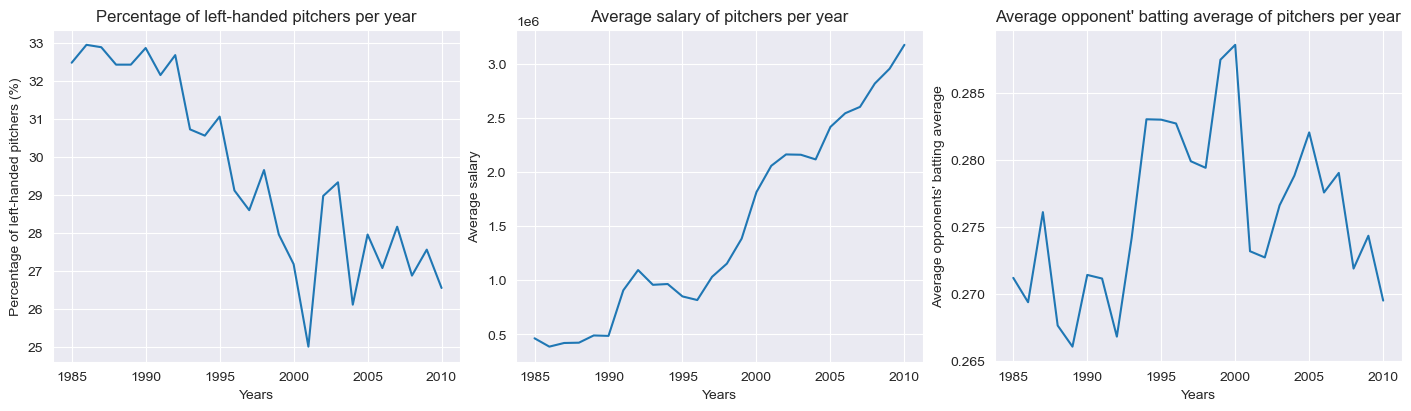

In [25]:

fig, ax = plt.subplots(1, 3, figsize = (14, 4), constrained_layout = True)
# Panel A
ax[0].plot(percentage_left_handed_by_year)
ax[0].set_title('Percentage of left-handed pitchers per year')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('Percentage of left-handed pitchers (%)')

# Panel B
ax[1].plot(average_salary_by_year)
ax[1].set_title('Average salary of pitchers per year')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Average salary')

# Panel C
ax[2].plot(average_opponents_batting_average)
ax[2].set_title("Average opponent' batting average of pitchers per year")
ax[2].set_xlabel('Years')
ax[2].set_ylabel("Average opponents' batting average")
plt.show()

**Values for year 2007**

In [26]:
YEAR = 2007
print(f'The percentage of left-handed pitchers for 2007 was: {percentage_left_handed_by_year[YEAR]:.3f}%.')
print(f'The average salary of all pitchers for 2007 was: {average_salary_by_year[YEAR]:.3f}.')
print(f"The average opponents' batting average for 2007 was: {average_opponents_batting_average[YEAR]:.3f}.")

The percentage of left-handed pitchers for 2007 was: 28.161%.
The average salary of all pitchers for 2007 was: 2600513.737.
The average opponents' batting average for 2007 was: 0.279.


**3.3 —** Create a single plot with 10 inches of width and 4 inches of height. The plot should contain two panels: 
- Panel A: The average salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot.
- Panel B: The average opponents' batting average for left and right-handed pitchers across the years, show 95% confidence intervals in your plot.


Additionally, print, for the year 1999:
- the average salary of left-handed pitchers.
- the average opponents' batting average of right-handed pitchers.

**Plot of data**

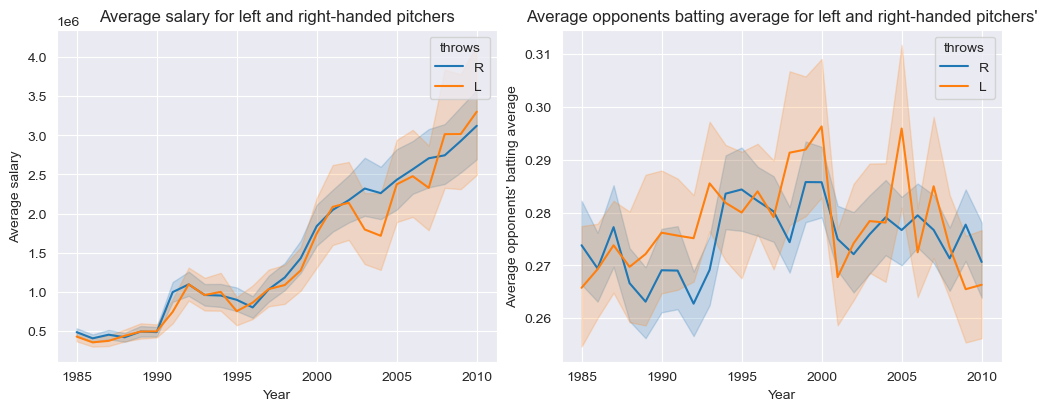

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4), constrained_layout = True)

# Panel A
sn.lineplot(df, x='yearID', y='salary', hue='throws', errorbar=('ci', 95), err_style='band', ax=ax[0])
ax[0].set_title('Average salary for left and right-handed pitchers')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average salary')

# Panel B
sn.lineplot(df, x='yearID', y='BAOpp', hue='throws', errorbar=('ci', 95), err_style='band', ax=ax[1])
ax[1].set_title("Average opponents batting average for left and right-handed pitchers'")
ax[1].set_xlabel('Year')
ax[1].set_ylabel("Average opponents' batting average")
plt.show()

**Values for year 1999**

In [28]:
YEAR = 1999
average_salary_by_year_L_R = df[['yearID', 'salary', 'throws']].groupby(['yearID', 'throws']).mean().salary
average_opponents_batting_average_l_R = df[['yearID', 'BAOpp', 'throws']].groupby(['yearID', 'throws']).mean().BAOpp

print(f'The average salary of left-handed pitcher for 1999: {average_salary_by_year_L_R[YEAR, "L"]:.3f}.')
print(f"The average opponents' batting average of right-handed pitcher for 1999 was: {average_opponents_batting_average_l_R[YEAR, 'R']:.3f}.")

The average salary of left-handed pitcher for 1999: 1272792.275.
The average opponents' batting average of right-handed pitcher for 1999 was: 0.286.


**3.4 —** /Discuss:/ Contrast the results obtained in Tasks 3.1 / 3.3 / 3.3 with the results obtained in Tasks 2.7 and 2.8. Are left-handed better than right-handed pitchers? Do they earn better salaries? Explain why the analysis might have reached different results.

**3.5 —** Before showing the final results to Mr. Russo, you pass them by Ms. Sakota once more. She looks happier now, but still looks a bit concerned. She asks you to perform a sanity check on the missing data for the period you are considering. Specifically, she is worried that there are significantly more missing salaries for left-handed pitchers or for right-handed pitchers.

- Create a plot with 10 inches of width and 4 inches of height. The plot should depict the fraction of missing salary  salary for left and right-handed pitchers per year, show 95% confidence intervals in your plot. 
- Print the fraction of left-handed pitchers with salary data missing for the year 2002. 
- /Discuss:/ According to the plot, are there significantly more missing salaries for left-handed pitchers?


**Plot of data**

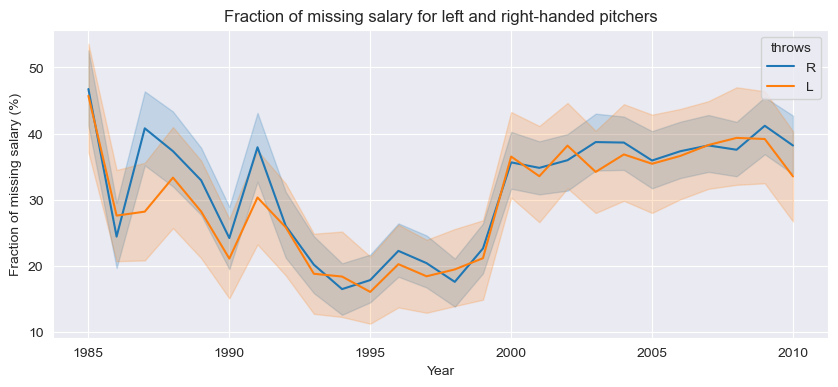

In [29]:
df_salary_fill_dummy = df.copy()
df_salary_fill_dummy.salary = df_salary_fill_dummy.salary.fillna(-1) # fill na with dummy value to prevent na from being removed by seaborn, and be able to easily aggregate them in plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
sn.lineplot(df_salary_fill_dummy, x='yearID', y='salary', hue='throws', errorbar=('ci', 95), err_style='band', estimator=lambda x: len(x[x == -1]) / len(x) * 100, ax=ax)
ax.set_title('Fraction of missing salary for left and right-handed pitchers')
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of missing salary (%)')
plt.show()

In [30]:
df_salary_nan_percentage = df[['yearID', 'salary', 'throws']].groupby(['yearID', 'throws']).agg(lambda x: x.isna().sum() / len(x) * 100).salary
print(f'Fraction of left-handed pitchers with missing salaries data: {df_salary_nan_percentage[2002, "L"]:.3f}%.')

Fraction of left-handed pitchers with missing salaries data: 38.172%.


**3.6 –**  /Discuss:/ If 95% of the salaries of right-handed pitchers were missing and none for the left-handed pitchers, what problem could you envision could happen downstream when you analyzed the data?